In [1]:
import numpy as np
import pandas as pd
import os
import re
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

p_data_raw       = os.path.abspath('../data/raw') # raw data path
p_data_processed = os.path.abspath('../data/processed') # processed data path
p_data_cleaned   = os.path.abspath('../data/cleaned') # clearned data path
p_data_src       = os.path.abspath('../data/src') # src data path

# MovieLens datasets
ml_links   = pd.read_csv(p_data_raw+'/ml-25m/links.csv') # movie links
ml_ratings = pd.read_csv(p_data_raw+'/ml-25m/ratings.csv') # user ratings
ml_movies  = pd.read_csv(p_data_raw+'/ml-25m/movies.csv') # movie list

# MovieLens tags
ml_tags          = pd.read_csv(p_data_raw+'/ml-25m/tags.csv') # userId, movieId, tag, timestamp
ml_genome_tags   = pd.read_csv(p_data_raw+'/ml-25m/genome-tags.csv') # tagId, tag
ml_genome_scores = pd.read_csv(p_data_raw+'/ml-25m/genome-scores.csv') # movieId, tagId, relevance

In [721]:
# IMDB Kmovie list
imdb_mat_orig = pd.read_pickle(p_data_raw+'/imdb_kr.pickle')

# IMDB Kmovie list join MovieLens
imdb_mat = pd.merge(imdb_mat_orig,ml_links,on='imdbId')

# IMDB Kmovie list join MovieLens movie list
imdb_mat = pd.merge(imdb_mat,ml_movies,on='movieId')

# MovieLens ratings join IMDB Kmovie list
k_ratings = pd.merge(ml_ratings,imdb_mat,on='movieId')

In [716]:
# len(k_ratings)
# pd.merge(k_ratings,ml_tags,how='left',
#          on=['userId','movieId']).groupby('tag')['userId'].count()#.sort_values(ascending=False)
# pd.merge(k_ratings,ml_tags,how='left',on=['userId','movieId']).head(100)
# sns.set_style("whitegrid")



Total Korean movies scraped from IMDB 700.


In [722]:
print('Total Korean movies scraped from IMDB: {}'.format(len(imdb_mat_orig)))
print('Total Korean movies found in MovieLens Dataset: {}'.format(len(imdb_mat)))

# create a user list
userId_list = k_ratings['userId'].unique().tolist()

# create a rating dataframe for all ratings
ratings = ml_ratings[ml_ratings.userId.isin(userId_list)]
ratings = pd.merge(ratings,ml_movies,on='movieId')

# Korean movie list
k_movie_list = k_ratings['movieId'].unique().tolist()

print('Total User #: {}'.format(len(userId_list)))

# ratings exclude kmovie
nk_ratings = ratings[~ratings.movieId.isin(k_movie_list)]

print('\n')
print('Total Ratings #: {}'.format(ratings.shape[0]))
print('Korean Movie Ratings #: {}'.format(k_ratings.shape[0]))
print('Non-Korean Movie Ratings #: {}'.format(nk_ratings.shape[0]))

# movie list
movie_list = ratings['movieId'].unique().tolist()
nk_movie_list = nk_ratings['movieId'].unique().tolist()

print('\n')
print('Total Movie #: {}'.format(len(movie_list)))
print('Korean Movie #: {}'.format(len(k_movie_list)))
print('Non-Korean Movie #: {}'.format(len(nk_movie_list)))

Total Korean movies scraped from IMDB: 10000
Total Korean movies found in MovieLens Dataset: 700
Total User #: 18567


Total Ratings #: 7912645
Korean Movie Ratings #: 46663
Non-Korean Movie Ratings #: 7865982


Total Movie #: 57507
Korean Movie #: 692
Non-Korean Movie #: 56815


In [20]:
# find kmovies with >= cutoff ratings
cutoff = 10
k_movie_list_t = k_ratings.groupby('movieId')['userId'].count().sort_values(ascending=False).to_frame()
k_movie_list_c = k_movie_list_t[k_movie_list_t['userId']>=cutoff].index.tolist()

print('Korean Movie # with >= {} ratings: {}'.format(cutoff, len(k_movie_list_c)))

imdb_mat_c = imdb_mat[imdb_mat.movieId.isin(k_movie_list_c)]
k_ratings_c = k_ratings[k_ratings.movieId.isin(k_movie_list_c)]

# user list cutted
userId_list_c = k_ratings_c['userId'].unique().tolist()

print('\n')
print('Cutted Total User #: {}'.format(len(userId_list_c)))

# create a rating dataframe for all ratings - cutted user list
ratings_c = ml_ratings[ml_ratings.userId.isin(userId_list_c)]
ratings_c = pd.merge(ratings_c,ml_movies,on='movieId')

# ratings exclude kmovie
nk_ratings_c = ratings_c[~ratings_c.movieId.isin(k_movie_list_c)]

print('\n')
print('Cutted Total Ratings #: {}'.format(ratings_c.shape[0]))
print('Cutted Korean Movie Ratings #: {}'.format(k_ratings_c.shape[0]))
print('Cutted Non-Korean Movie Ratings #: {}'.format(nk_ratings_c.shape[0]))

# cutted movie list
movie_list_c = ratings_c['movieId'].unique().tolist()
nk_movie_list_c = nk_ratings_c['movieId'].unique().tolist()

print('\n')
print('Cutted Total Movie #: {}'.format(len(movie_list_c)))
print('Cutted Korean Movie #: {}'.format(len(k_movie_list_c)))
print('Cutted Non-Korean Movie #: {}'.format(len(nk_movie_list_c)))

Korean Movie # with >= 10 ratings: 280


Cutted Total User #: 18517


Cutted Total Ratings #: 7896047
Cutted Korean Movie Ratings #: 45160
Cutted Non-Korean Movie Ratings #: 7850887


Cutted Total Movie #: 57400
Cutted Korean Movie #: 280
Cutted Non-Korean Movie #: 57120


In [21]:
# extract 1st genre
nk_ratings_c['genre1'] = nk_ratings_c['genres'].apply(lambda s:s.split('|')[0])
k_ratings_c['genre1'] = k_ratings_c['genres'].apply(lambda s:s.split('|')[0])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# print(nk_ratings_c.groupby('genre1')['movieId'].count().sort_values(ascending=False))
print(nk_ratings_c.groupby('genre1')['movieId'].nunique().sort_values(ascending=False))

# print(k_ratings_c.groupby('genre1')['movieId'].count().sort_values(ascending=False))
print(k_ratings_c.groupby('genre1')['movieId'].nunique().sort_values(ascending=False))

genre1
Drama                 14217
Comedy                12521
Action                 6617
Documentary            4926
(no genres listed)     4329
Horror                 3233
Crime                  2770
Adventure              2271
Animation              2038
Children               1236
Thriller                847
Sci-Fi                  476
Western                 404
Romance                 354
Mystery                 340
Fantasy                 325
Musical                  94
War                      84
Film-Noir                37
IMAX                      1
Name: movieId, dtype: int64
genre1
Action                97
Drama                 73
Crime                 30
Comedy                28
Horror                16
Thriller               9
Mystery                7
Animation              6
(no genres listed)     5
Fantasy                3
Sci-Fi                 2
War                    1
Romance                1
Children               1
Adventure              1
Name: movieId, dtype: i

In [23]:
# remove missing genres for kmovie
nk_ratings_c['genre1'] = nk_ratings_c['genre1'].apply(lambda s:re.sub(
    'Fantasy|Adventure|Romance|Documentary|Children|Sci-Fi|War|Western|Musical|Film-Noir|IMAX',
    'Other',s).replace('(no genres listed)','Other'))
k_ratings_c['genre1'] = k_ratings_c['genre1'].apply(lambda s:re.sub(
    'Fantasy|Adventure|Romance|Documentary|Children|Sci-Fi|War|Western|Musical|Film-Noir|IMAX',
    'Other',s).replace('(no genres listed)','Other'))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
print(nk_ratings_c.groupby('genre1')['movieId'].count().sort_values(ascending=False))
print(k_ratings_c.groupby('genre1')['movieId'].count().sort_values(ascending=False))

# print(nk_ratings_c.groupby('genre1')['movieId'].nunique().sort_values(ascending=False))
# print(k_ratings_c.groupby('genre1')['movieId'].nunique().sort_values(ascending=False))

genre1
Action       2357863
Comedy       1620192
Drama        1575680
Other        1108807
Crime         593056
Horror        274682
Animation     195909
Mystery        71898
Thriller       52800
Name: movieId, dtype: int64
genre1
Mystery      12412
Action       11176
Drama         8835
Crime         7710
Comedy        3662
Thriller       391
Horror         380
Animation      340
Other          254
Name: movieId, dtype: int64


In [101]:
# genre mat exclude kmovie
genremat_nk_mean = nk_ratings_c.pivot_table(index='userId',columns='genre1',values='rating')
genremat_nk_count = nk_ratings_c.pivot_table(index='userId',columns='genre1',values='rating',
                                             aggfunc=len,fill_value=0)

# kmovie genre mat
genremat_k_mean = k_ratings_c.pivot_table(index='userId',columns='genre1',values='rating_x')
genremat_k_count = k_ratings_c.pivot_table(index='userId',columns='genre1',values='rating_x',
                                           aggfunc=len,fill_value=0)

In [173]:
# remove genres contain nan
genremat_nk_mean_f = genremat_nk_mean.dropna()

userId_list_f = genremat_nk_mean_f.index.tolist()

genremat_nk_count_f = genremat_nk_count[genremat_nk_count.index.isin(userId_list_f)]
genremat_k_mean_f = genremat_k_mean[genremat_k_mean.index.isin(userId_list_f)]
genremat_k_count_f = genremat_k_count[genremat_k_count.index.isin(userId_list_f)]

In [331]:
# user list final
print('Final Total User #: {}'.format(len(userId_list_f)))

# create a rating dataframe for all ratings - final user list
ratings_f = ratings_c[ratings_c.userId.isin(userId_list_f)]
ratings_f = pd.merge(ratings_f,ml_movies,on='movieId')

k_ratings_f = k_ratings_c[k_ratings_c.userId.isin(userId_list_f)]
nk_ratings_f = nk_ratings_c[nk_ratings_c.userId.isin(userId_list_f)]

print('\n')
print('Final Total Ratings #: {}'.format(ratings_f.shape[0]))
print('Final Korean Movie Ratings #: {}'.format(k_ratings_f.shape[0]))
print('Final Non-Korean Movie Ratings #: {}'.format(nk_ratings_f.shape[0]))

# final movie list
movie_list_f = ratings_f['movieId'].unique().tolist()
k_movie_list_f = k_ratings_f['movieId'].unique().tolist()
nk_movie_list_f = nk_ratings_f['movieId'].unique().tolist()

print('\n')
print('Final Total Movie #: {}'.format(len(movie_list_f)))
print('Final Korean Movie #: {}'.format(len(k_movie_list_f)))
print('Final Non-Korean Movie #: {}'.format(len(nk_movie_list_f)))

Final Total User #: 9774


Final Total Ratings #: 6556920
Final Korean Movie Ratings #: 31769
Final Non-Korean Movie Ratings #: 6525151


Final Total Movie #: 56958
Final Korean Movie #: 280
Final Non-Korean Movie #: 56678


In [626]:
movie_df_f = ml_movies[ml_movies.movieId.isin(movie_list_f)]
k_movie_df_f = ml_movies[ml_movies.movieId.isin(k_movie_list_f)]
nk_movie_df_f = ml_movies[ml_movies.movieId.isin(nk_movie_list_f)]

In [628]:
movie_df_f['genre1'] = movie_df_f['genres'].apply(lambda s:s.split('|')[0])
k_movie_df_f['genre1'] = k_movie_df_f['genres'].apply(lambda s:s.split('|')[0])
nk_movie_df_f['genre1'] = nk_movie_df_f['genres'].apply(lambda s:s.split('|')[0])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [636]:
movie_df_f['year'] = movie_df_f['title'].apply(lambda s:s.split()[-1].replace('(','').replace(')',''))
k_movie_df_f['year'] = k_movie_df_f['title'].apply(lambda s:s.split()[-1].replace('(','').replace(')',''))
nk_movie_df_f['year'] = nk_movie_df_f['title'].apply(lambda s:s.split()[-1].replace('(','').replace(')',''))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [644]:
# movie_df_f.to_csv(p_data_processed+'/movie_df_f.csv', index=False)
# k_movie_df_f.to_csv(p_data_processed+'/k_movie_df_f.csv', index=False)
# nk_movie_df_f.to_csv(p_data_processed+'/nk_movie_df_f.csv', index=False)

# imdb_mat_f = imdb_mat[imdb_mat.movieId.isin(k_movie_list_f)]
# imdb_mat_f['genre1'] = imdb_mat_f['genres'].apply(lambda s:s.split('|')[0])
# imdb_mat_f['year'] = imdb_mat_f['title'].apply(lambda s:s.split()[-1].replace('(','').replace(')',''))
# imdb_mat_f.to_csv(p_data_processed+'/imdb_mat_f.csv', index=False)

imdb_mat_f

,name,year,rating,metascore,vote,imdb_id,poster,genre,certificate,runtime,director_actor,story,imdbId,movieId,tmdbId,title,genres,genre1
1,"Yongary, Monster from the Deep",1967,3.8,NaN,1341.0,tt0061549,https://m.media-amazon.com/images/M/MV5BNGM4NW...,"\nAction, Adventure, Comedy",PG,80 min,\n Director:\nKi-duk Kim\n| \n Stars:\nY...,\n Earthquakes in central Korea turn out to...,61549,102025,42699.0,Yongary: Monster from the Deep (1967),Children|Horror|Sci-Fi,Children
9,Why Has Bodhi-Dharma Left for the East?,1989,7.5,NaN,1189.0,tt0097195,https://m.media-amazon.com/images/M/MV5BNDliND...,\nDrama,Not Rated,137 min,\n Director:\nYong-Kyun Bae\n| \n Stars:...,\n About three monks in a remote monastery;...,97195,32705,62637.0,Why Has Bodhi-Dharma Left for the East?: A Zen...,Drama,Drama
12,Sopyonje,1993,7.7,NaN,835.0,tt0108192,https://m.media-amazon.com/images/M/MV5BMWIxMT...,"\nDrama, Music",NaN,112 min,\n Director:\nKwon-taek Im\n| \n Stars:\...,"\n Despite its falling popularity, a father...",108192,80419,124315.0,Seopyeonje (1993),Drama|Musical,Drama
13,301/302,1995,6.4,NaN,960.0,tt0112257,https://m.media-amazon.com/images/M/MV5BOTE0MG...,"\nHorror, Mystery, Thriller",Unrated,100 min,\n Director:\nCheol-su Park\n| \n Stars:...,"\n Two obsessive-compulsives, a chef and an...",112257,652,54285.0,"301, 302 (301/302) (1995)",Horror|Mystery|Thriller,Horror
18,Christmas in August,1998,7.6,NaN,3178.0,tt0140825,https://m.media-amazon.com/images/M/MV5BOTU0MW...,"\nDrama, Romance",Not Rated,97 min,\n Director:\nJin-ho Hur\n| \n Stars:\nS...,\n Hahn Suk-Kyu suffers from a fatal diseas...,140825,34464,26935.0,Christmas in August (Palwolui Christmas) (1998),Drama|Romance,Drama
19,The Housemaid,1960,7.3,NaN,3119.0,tt0150980,https://m.media-amazon.com/images/M/MV5BYTNlNj...,"\nCrime, Drama, Thriller",Not Rated,109 min,\n Director:\nKi-young Kim\n| \n Stars:\...,\n A composer and his wife are thrown into ...,150980,87040,42506.0,"Housemaid, The (Hanyo) (1960)",Crime|Drama|Horror,Crime
24,The Quiet Family,1998,7.0,NaN,4090.0,tt0188503,https://m.media-amazon.com/images/M/MV5BYWVhZD...,"\nComedy, Crime, Horror",NaN,101 min,\n Director:\nJee-woon Kim\n| \n Stars:\...,\n A family opens a mountain inn where thei...,188503,170551,74336.0,The Quiet Family (1998),Comedy,Comedy
25,Birdcage Inn,1998,7.0,NaN,1610.0,tt0190268,https://m.media-amazon.com/images/M/MV5BY2ExNz...,\nDrama,NaN,105 min,\n Director:\nKi-duk Kim\n| \n Stars:\nJ...,\n Streetwise Jin-a moves into a boarding h...,190268,41820,2777.0,Birdcage Inn (Paran daemun) (1998),Drama,Drama
27,Swiri,1999,6.6,50.0,7761.0,tt0192657,https://m.media-amazon.com/images/M/MV5BZDZmMT...,"\nAction, Thriller",R,125 min,\n Director:\nJe-kyu Kang\n| \n Stars:\n...,\n South Korean agents Ryu and Lee are trac...,192657,8093,10355.0,Shiri (Swiri) (1999),Action|Drama|Romance|Thriller,Action
29,Tell Me Something,1999,6.5,61.0,2867.0,tt0220806,https://m.media-amazon.com/images/M/MV5BMjEyMT...,"\nCrime, Mystery, Thriller",R,118 min,\n Director:\nYun-hyeon Jang\n| \n Stars...,"\n Lieutenant Cho, a cop on the edge, is mo...",220806,50165,16371.0,Tell Me Something (Telmisseomding) (1999),Crime|Horror|Mystery|Thriller,Crime


In [617]:
# nk_ratings_f.drop(['label_x','label_c','label_y'],axis=1,inplace=True)
# k_ratings_f.drop(['label_c'],axis=1,inplace=True)

# ratings_f.to_csv(p_data_processed+'/ratings_f.csv', index=False)
# nk_ratings_f.to_csv(p_data_processed+'/nk_ratings_f.csv', index=False)
# k_ratings_f.to_csv(p_data_processed+'/k_ratings_f.csv', index=False)

In [619]:
# # save rating matrix
# ratingmat_f = ratings_f.pivot_table(index='userId',columns='movieId',values='rating')
# ratingmat_f.to_csv(p_data_processed+'/ratingmat_f.csv', index=False)

# nk_ratingmat_f = nk_ratings_f.pivot_table(index='userId',columns='movieId',values='rating')
# nk_ratingmat_f.to_csv(p_data_processed+'/nk_ratingmat_f.csv', index=False)

# k_ratingmat_f = k_ratings_f.pivot_table(index='userId',columns='movieId',values='rating_x')
# k_ratingmat_f.to_csv(p_data_processed+'/k_ratingmat_f.csv', index=False)

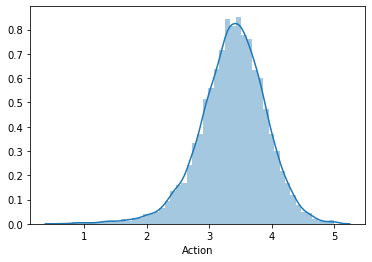

In [180]:
sns.distplot(genremat_nk_mean_f['Action'])

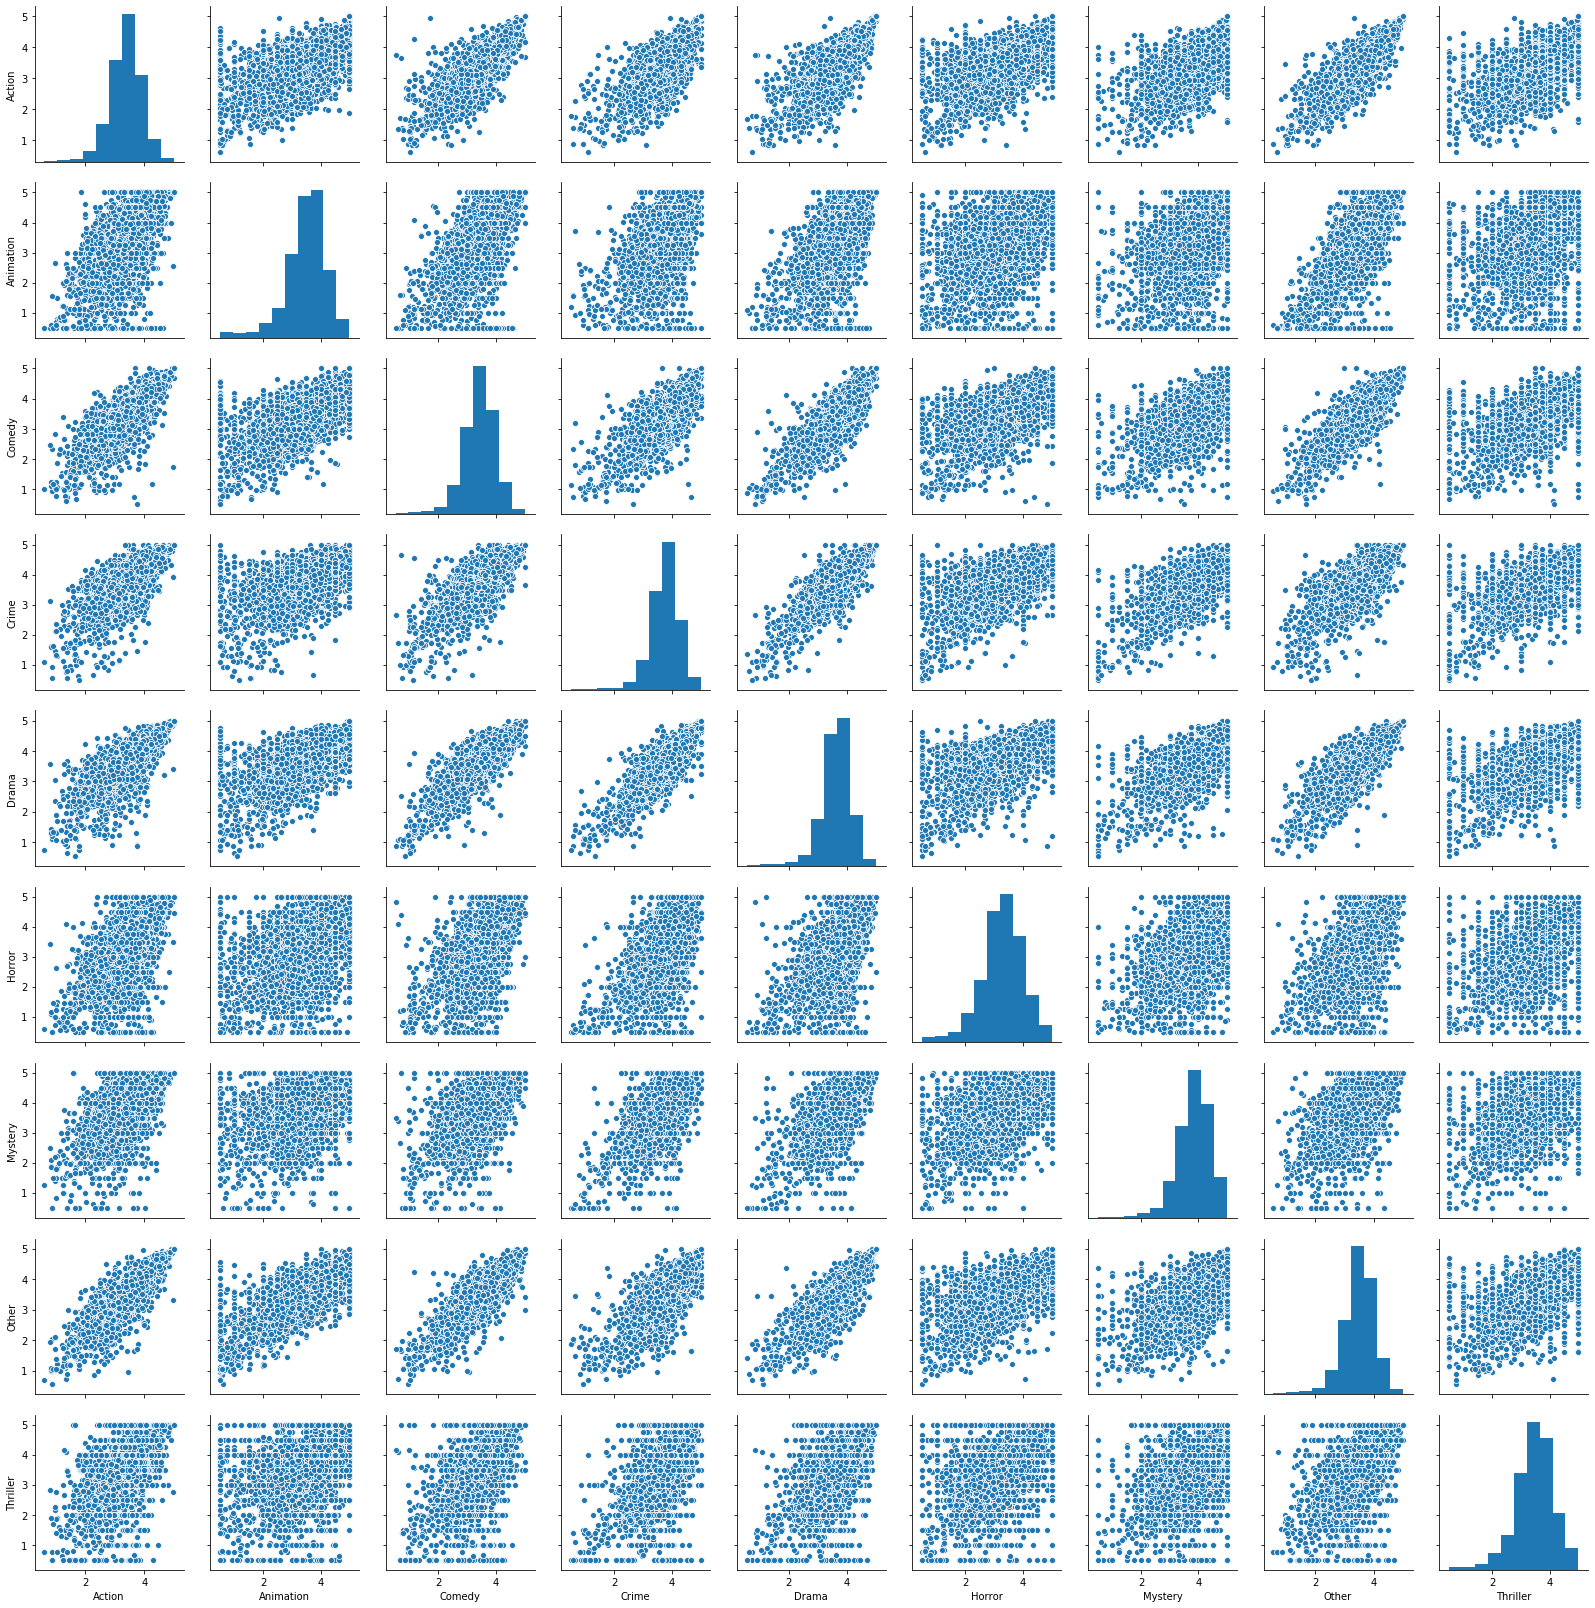

In [190]:
sns.pairplot(data=genremat_nk_mean_f)

In [195]:
genremat_nk_mean_f.T

userId,3,57,84,95,113,174,181,185,187,207,...,162386,162424,162457,162476,162481,162484,162508,162516,162533,162534
genre1,,,,,,,,,,,,,,,,,,,,,
Action,3.639640,3.335938,2.963415,3.629630,3.602941,3.296875,1.786017,3.906250,3.935802,3.626667,...,3.907480,3.825967,3.546512,3.123529,3.531818,2.956522,3.702500,3.138920,3.376923,3.118182
Animation,4.227273,3.181818,3.400000,3.791667,3.375000,0.625000,0.875000,4.500000,3.666667,3.000000,...,4.250000,3.250000,3.000000,3.833333,3.950000,3.250000,4.500000,3.246094,3.785714,3.954545
Comedy,3.342391,3.930657,3.455357,3.681818,3.631579,3.357143,1.574219,4.105263,3.717949,3.190476,...,4.025641,3.879630,3.595238,3.470238,3.565574,3.044944,2.897683,2.984269,3.603896,3.296296
Crime,4.147727,4.326087,3.718750,3.868421,3.500000,4.583333,2.059524,4.636364,4.136986,3.981481,...,4.250000,4.465116,3.594595,4.034483,4.046875,3.261364,2.875862,3.382759,3.985714,3.173913
Drama,3.962963,4.083333,3.625000,3.842105,3.379310,4.052083,2.038462,4.386364,4.082386,3.644737,...,3.725806,4.080000,3.485714,3.646739,3.912162,3.201863,2.613592,3.062373,3.754545,3.475000
Horror,3.437500,2.100000,2.750000,2.875000,3.250000,4.166667,2.029412,4.500000,3.782051,2.700000,...,4.026316,3.437500,2.400000,2.484375,3.939394,3.000000,3.281250,2.806228,2.250000,3.250000
Mystery,3.928571,4.625000,3.666667,3.750000,4.333333,3.000000,2.600000,4.000000,4.346154,4.250000,...,4.000000,4.000000,3.166667,3.250000,4.500000,3.666667,3.250000,3.308824,3.666667,4.000000
Other,3.763514,3.864583,3.500000,3.559524,3.250000,3.250000,1.944444,4.200000,3.796569,3.250000,...,4.058333,4.186441,3.058140,3.731481,3.491667,3.136054,3.573770,3.056872,3.750000,3.250000
Thriller,3.375000,4.000000,4.500000,3.500000,3.750000,4.500000,1.916667,4.500000,4.111111,3.500000,...,4.166667,2.375000,3.500000,2.937500,3.500000,2.857143,3.750000,3.264151,4.000000,3.250000


In [221]:
#####################
# clustering
#####################

# PCA Projection to 3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

# Standardizing the features
# scaler = MinMaxScaler()
# scaler = StandardScaler()
# x = scaler.fit_transform(genremat_nk_mean_f.T)
# x = scaler.fit_transform(genremat_nk_count_f)

n_comp = 3
pca = PCA(n_components=n_comp, svd_solver='arpack')
principalComponents = pca.fit_transform(genremat_nk_mean_f)
principalDf = pd.DataFrame(data=principalComponents,
                           # columns=['PCA1','PCA2'],
                           columns=['PCA1','PCA2','PCA3']
                           # columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']
                          )

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.6450529  0.10303064 0.08431683]
Cumulative explained variation for principal components: 0.8324003751971035


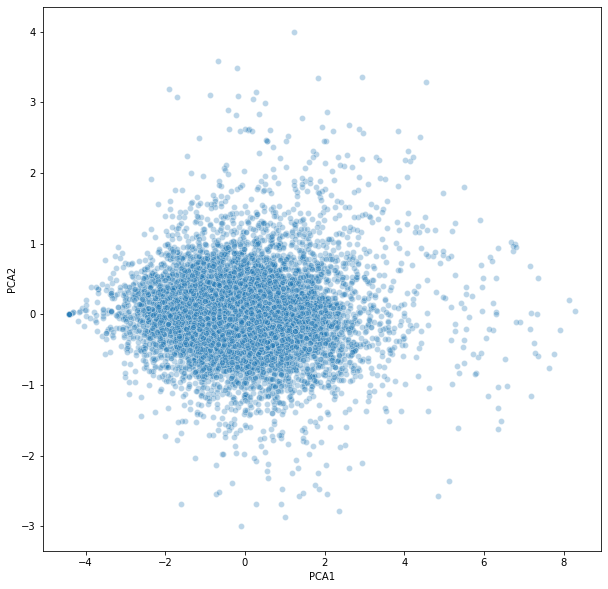

In [222]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PCA1',
                y='PCA2',
                data=principalDf,
                alpha=0.3)

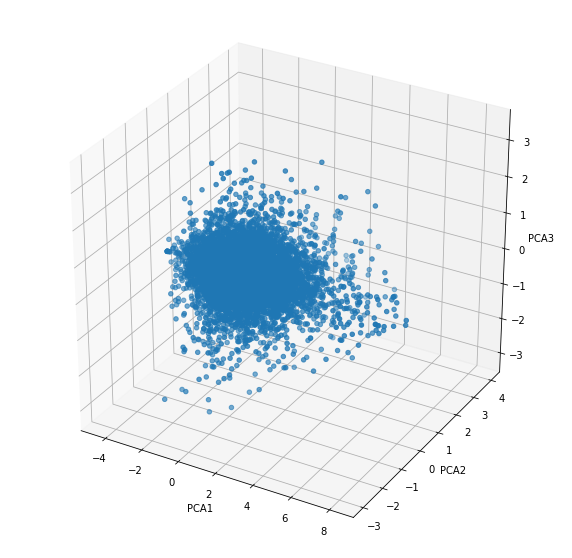

In [223]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x =principalDf['PCA1']
y =principalDf['PCA2']
z =principalDf['PCA3']

ax.scatter(x,y,z
          # ,c='r',marker='o'
          )

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

In [233]:
# TSNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

import time

time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne = TSNE(n_components=2)
# tsne_results = tsne.fit_transform(principalDf)
tsne_results = tsne.fit_transform(genremat_nk_mean_f)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 72.37590789794922 seconds


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


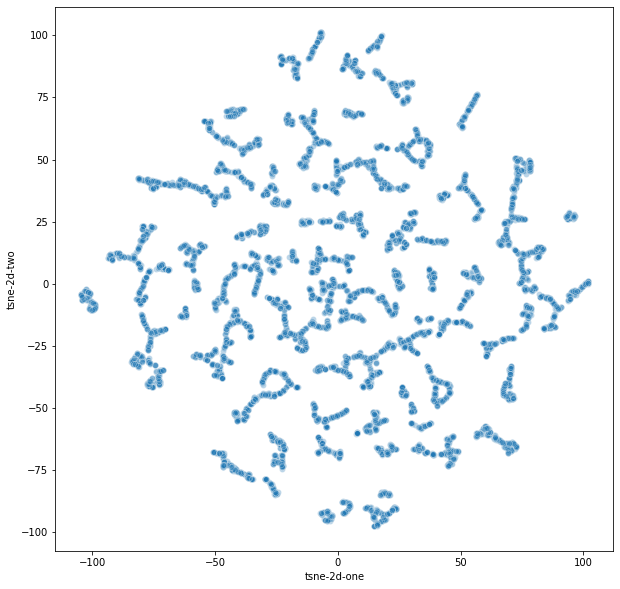

In [234]:
genremat_nk_mean_f['tsne-2d-one'] = tsne_results[:,0]
genremat_nk_mean_f['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="y",
    palette=sns.color_palette("hls", 10),
    data=genremat_nk_mean_f,
    legend="full",
    alpha=0.3
)

In [235]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

X = tsne_results
# X = principalDf
# X = genremat_mean

In [257]:
# Distortion: It is calculated as the average of the squared distances from the cluster
#     centers of the respective clusters. Typically, the Euclidean distance metric is used.
# Inertia: It is the sum of squared distances of samples to their closest cluster center.

# K = range(3,50)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

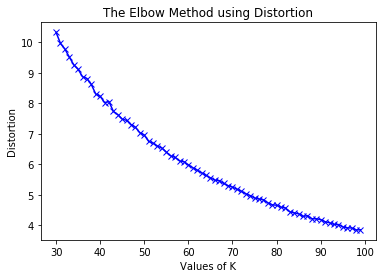

In [296]:
# Using the different values of Distortion
# for key,val in mapping1.items(): 
#     print(str(key)+' : '+str(val))
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

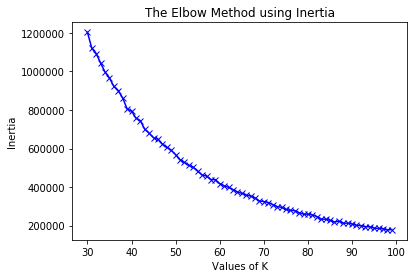

In [297]:
# Using the different values of Inertia
# for key,val in mapping2.items(): 
#     print(str(key)+' : '+str(val))
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

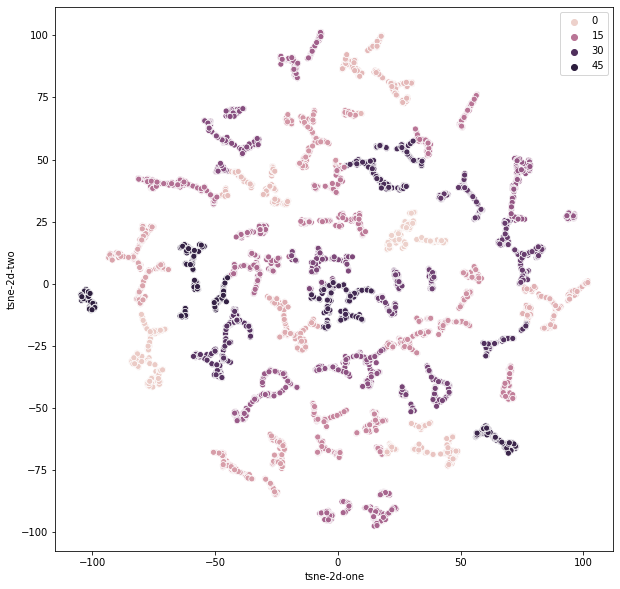

In [256]:
kmeans = KMeans(n_clusters=36)

# from sklearn.cluster import SpectralClustering
# kmeans = SpectralClustering(n_clusters=10)

kmeans.fit(X)
kmeans.cluster_centers_

plt.figure(figsize=(10,10))
sns.scatterplot(x=genremat_nk_mean_f['tsne-2d-one'],
                y=genremat_nk_mean_f['tsne-2d-two'],
                data=genremat_nk_mean_f,hue=kmeans.labels_)

In [276]:
genremat_nk_mean_f.drop(columns=['tsne-2d-one','tsne-2d-two'],inplace=True)
genremat_nk_mean_f['label'] = kmeans.labels_.tolist()

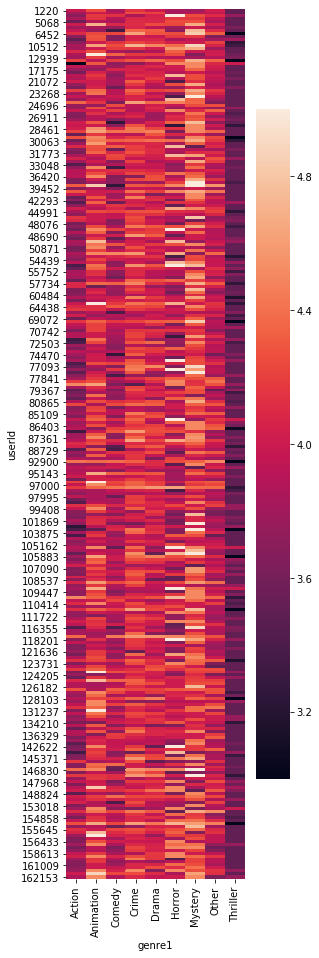

In [288]:
plt.figure(figsize=(4,16))
sns.heatmap(genremat_nk_mean_f.loc[genremat_nk_mean_f['label']==1].drop(columns=['label']))

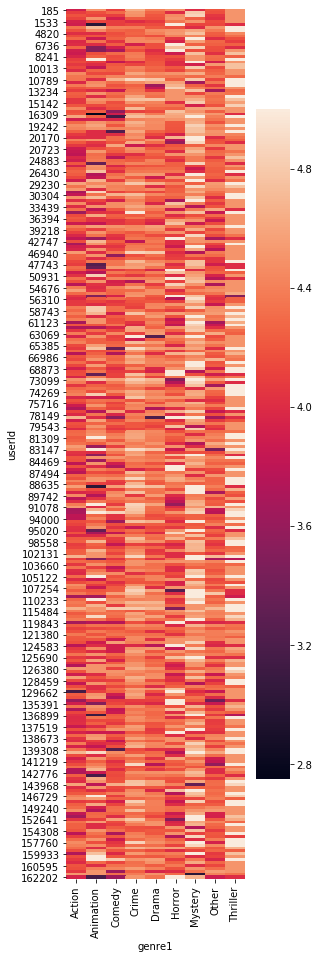

In [294]:
plt.figure(figsize=(4,16))
sns.heatmap(genremat_nk_mean_f.loc[genremat_nk_mean_f['label']==5].drop(columns=['label']))

In [295]:
# save labels
genremat_nk_mean_f.to_csv('/figures/TSNE_1.csv')

In [ ]:
####################################################
# Model
####################################################

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


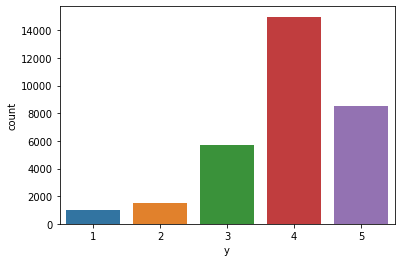

In [332]:
# prepare for 'X'
k_ratings_f['year_n'] = k_ratings_f['year'].apply(lambda s:int(re.sub('[^0-9]', '', s)))
k_ratings_f['runtime_n'] = k_ratings_f['runtime'].apply(lambda s:int(re.sub('[^0-9]', '', s)))

# attach label
k_ratings_f = pd.merge(k_ratings_f,genremat_nk_mean_f[['label']],on='userId')
k_ratings_f['label_c'] = k_ratings_f['label'].apply(lambda s:str(s))

# prepare for 'y'
k_ratings_f['y'] = k_ratings_f['rating_x'].apply(lambda n:int(math.ceil(n)))
sns.countplot(x='y',data=k_ratings_f)

In [388]:
k_ratings_f.iloc[0]

userId                                                          181
movieId                                                        8014
rating_x                                                        1.5
timestamp                                                1547804302
name                     Spring, Summer, Fall, Winter... and Spring
year                                                         (2003)
rating_y                                                          8
metascore                                                        85
vote                                                          74747
imdb_id                                                   tt0374546
poster            https://m.media-amazon.com/images/M/MV5BMTI0OD...
genre                                  \nDrama, Romance            
certificate                                                       R
runtime                                                     103 min
director_actor    \n    Director:\nKi-duk Kim\n|

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


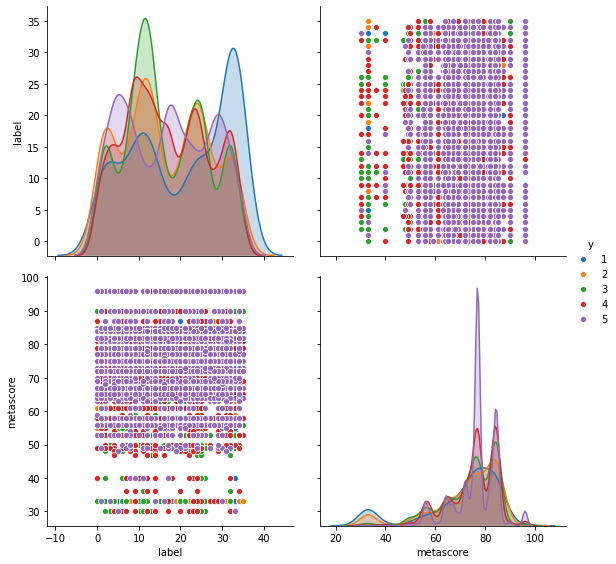

In [389]:
sns.pairplot(k_ratings_f,height=4,vars=['label','metascore'],hue='y')

In [419]:
# X = pd.concat([k_ratings_f.drop(['userId', 'movieId', 'rating_x', 'timestamp', 'name', 'year',
#                                   'rating_y', 'metascore', 'vote', 'imdb_id', 'poster', 'genre',
#                                   'certificate', 'runtime', 'director_actor', 'story', 'imdbId', 'tmdbId',
#                                   'title', 'genres', 'genre1', 'genre_score', 'label', 'label_c'
#                                  ], axis = 1),
X = pd.concat([k_ratings_f.drop(['userId', 'movieId', 'rating_x', 'name', 'year',
                                  'rating_y', 'imdb_id', 'poster', 'genre',
                                  'certificate', 'runtime', 'director_actor', 'story', 'imdbId', 'tmdbId',
                                  'title', 'genres', 'genre1', 'label', 'label_c'
                                 #,'metascore'
                                 ,'y'
                                 #,'timestamp','vote'
                                 ], axis = 1),
               pd.get_dummies(k_ratings_f[['certificate','label_c']], 
                              drop_first = True, dummy_na = True)],axis = 1)
y = k_ratings_f['y']

# fill metascore null values with mean
X['metascore'].fillna(X['metascore'].mean(), inplace=True)

In [409]:
# #############################################
# # Benchmark Estimate - Regression
# #############################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

SEED = 42
TEST_SIZE = 0.2

def model_evaluation(y_test, predictions):
    print('Confusion Matrix\n\n{}'.format(confusion_matrix(y_test, predictions)))
    print('\n')
    print('Classification Report\n\n{}'.format(classification_report(y_test, predictions)))
    print('\n')
    print('Accuracy Score\n\n{}'.format(accuracy_score(y_test, predictions)))

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = TEST_SIZE, random_state = SEED)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

# # Naive Bayes
# nb = MultinomialNB()
# nb.fit(X_train, y_train)
# predictions = nb.predict(X_test)

# # SGDClassifier
# sgd = SGDClassifier(max_iter=1000, tol=1e-3)
# sgd.fit(X_train, y_train)
# predictions = sgd.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  69    4   32   86    7]
 [  21    6   46  187   10]
 [  18    0  186  860   72]
 [  16    1  102 2490  402]
 [  12    1   30 1021  675]]


Classification Report

              precision    recall  f1-score   support

           1       0.51      0.35      0.41       198
           2       0.50      0.02      0.04       270
           3       0.47      0.16      0.24      1136
           4       0.54      0.83      0.65      3011
           5       0.58      0.39      0.46      1739

    accuracy                           0.54      6354
   macro avg       0.52      0.35      0.36      6354
weighted avg       0.53      0.54      0.49      6354



Accuracy Score

0.5391879131255902


In [366]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

[ True  True  True  True  True  True False False  True False False False
 False False  True False False  True  True False  True False False  True
  True False  True False  True  True False  True  True False  True False
  True False  True False  True  True False False False  True False False
 False  True False]
[ 1  1  1  1  1  1 25  2  1 24  5 23 26 15  1  4 17  1  1 13  1 22 10  1
  1  7  1 12  1  1 14  1  1 11  1  8  1 16  1 20  1  1  9 21  6  1 18  3
 19  1 27]
Index(['timestamp', 'vote', 'year_n', 'runtime_n', 'y',
       'certificate_Not Rated', 'certificate_PG', 'certificate_PG-13',
       'certificate_R', 'certificate_TV-14', 'certificate_TV-MA',
       'certificate_TV-PG', 'certificate_TV-Y7-FV', 'certificate_Unrated',
       'certificate_nan', 'label_c_1', 'label_c_10', 'label_c_11',
       'label_c_12', 'label_c_13', 'label_c_14', 'label_c_15', 'label_c_16',
       'label_c_17', 'label_c_18', 'label_c_19', 'label_c_2', 'label_c_20',
       'label_c_21', 'label_c_22', 'label_c

In [547]:
import statsmodels.api as sm
#logit_model=sm.Logit(y/5, X)
logit_model=sm.OLS(y, X)
result=logit_model.fit()
print(result.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.269     
Dependent Variable:    y                   AIC:                   77698.6851
Date:                  2020-06-10 20:38    BIC:                   80183.4603
No. Observations:      31769               Log-Likelihood:        -38552.   
Df Model:              296                 F-statistic:           40.58     
Df Residuals:          31472               Prob (F-statistic):    0.00      
R-squared:             0.276               Scale:                 0.66935   
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
timestamp                   -0.0000   0.0000  -1.0708 0.2843 -0.0000  0.0000
metascore                    0.0050   0.0019   2.5734 0.0101  0.0012  0.0087
vote                  

In [413]:
var_to_remove = ['label_c_15','label_c_17','label_c_23',
                'label_c_24','label_c_3','label_c_35',
                'label_c_6','label_c_9']

In [422]:
X.drop(columns=var_to_remove, inplace=True)

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = TEST_SIZE, random_state = SEED)

# data scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  64    0   35   92    7]
 [  17    0   47  197    9]
 [  12    0   94  982   48]
 [  12    0   71 2615  313]
 [  12    0   27 1130  570]]


Classification Report

              precision    recall  f1-score   support

           1       0.55      0.32      0.41       198
           2       0.00      0.00      0.00       270
           3       0.34      0.08      0.13      1136
           4       0.52      0.87      0.65      3011
           5       0.60      0.33      0.42      1739

    accuracy                           0.53      6354
   macro avg       0.40      0.32      0.32      6354
weighted avg       0.49      0.53      0.46      6354



Accuracy Score

0.5261252754170601


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Error Rate')

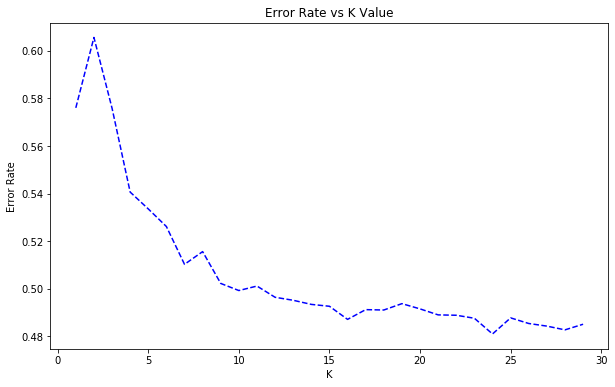

In [431]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [434]:
###############
# Tree
###############
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

# rfc = RandomForestClassifier(n_estimators=200)
# rfc.fit(X_train,y_train)
# predictions = rfc.predict(X_test)

model_evaluation(y_test, predictions)

Confusion Matrix

[[  56   23   40   53   26]
 [  22   35   77  102   34]
 [  29  101  324  482  200]
 [  63  136  500 1627  685]
 [  21   47  187  752  732]]


Classification Report

              precision    recall  f1-score   support

           1       0.29      0.28      0.29       198
           2       0.10      0.13      0.11       270
           3       0.29      0.29      0.29      1136
           4       0.54      0.54      0.54      3011
           5       0.44      0.42      0.43      1739

    accuracy                           0.44      6354
   macro avg       0.33      0.33      0.33      6354
weighted avg       0.44      0.44      0.44      6354



Accuracy Score

0.43657538558388415


In [435]:
###############
# SVM
###############
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

# rfc = RandomForestClassifier(n_estimators=200)
# rfc.fit(X_train,y_train)
# predictions = rfc.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix

[[  63    0   34   97    4]
 [  13    0   39  215    3]
 [  11    0   96 1003   26]
 [  11    0   76 2729  195]
 [  11    0   33 1297  398]]


Classification Report

              precision    recall  f1-score   support

           1       0.58      0.32      0.41       198
           2       0.00      0.00      0.00       270
           3       0.35      0.08      0.14      1136
           4       0.51      0.91      0.65      3011
           5       0.64      0.23      0.34      1739

    accuracy                           0.52      6354
   macro avg       0.41      0.31      0.31      6354
weighted avg       0.50      0.52      0.44      6354



Accuracy Score

0.5171545483160214


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [437]:
# add director & actor info
k_ratings_f.loc[0]

userId                                                          181
movieId                                                        8014
rating_x                                                        1.5
timestamp                                                1547804302
name                     Spring, Summer, Fall, Winter... and Spring
year                                                         (2003)
rating_y                                                          8
metascore                                                        85
vote                                                          74747
imdb_id                                                   tt0374546
poster            https://m.media-amazon.com/images/M/MV5BMTI0OD...
genre                                  \nDrama, Romance            
certificate                                                       R
runtime                                                     103 min
director_actor    \n    Director:\nKi-duk Kim\n|

In [464]:
# director
k_ratings_f['director'] = k_ratings_f['director_actor'].apply(
    lambda s:re.sub('Director:|\n|-','',(s.split('Stars:')[0])).replace('|','').strip())
# re.sub('\n','',ratings_join['director_actor'][10000].split('Stars:')[1]).split(', ')
# re.sub(':|,',' ',re.sub('Director:|Stars|\n| ','',(ratings_join['director_actor'].iloc[5000])).replace('|','').strip())
director1 = []
director2 = []
for index, row in k_ratings_f.iterrows():
    director1.append(row['director'].split(', ')[0].replace('Directors:','').replace(' ',''))
    if row['director'].find('Directors:')>-1:
        director2.append(row['director'].split(', ')[1])
    else:
        director2.append('')

k_ratings_f['director1'] = pd.Series(director1)
k_ratings_f['director2'] = pd.Series(director2)

k_ratings_f.groupby('director1')['movieId'].count().sort_values(ascending=False)

director1
ChanwookPark     10640
BongJoonHo        6817
KidukKim          3030
JeewoonKim        2282
HongjinNa          906
SanghoYeon         859
JeongbeomLee       576
JekyuKang          522
ChangdongLee       452
JaeyoungKwak       318
HyungraeShim       204
SungsuKim          198
HoonjungPark       175
MoonsaengKim       169
JoonHwanJang       167
SangsooHong        130
ByunggilJung       124
HanminKim          121
HunJang            120
SeungwanRyoo       119
JohnH.Lee          113
CheolsooJang       101
SangJinKim          99
TaegyunKim          96
SeonghunKim         94
HaYoo               94
KwontaekIm          92
ShinyeonWon         84
PilsungYim          84
JeonghyangLee       72
                 ...  
YoonSeongKang       11
MinhoWoo            11
JulyJung            11
JeguYun             11
YongKyunBae         11
MinhoCho            11
JoohwanKim          11
SunghyunByun        11
JoonkiMin           10
GinaKim             10
JinwonChoi          10
JingleMa            10
Y

In [449]:
# # cutoff
# cutoff = 10
# k_director_list_f = k_ratings_f.groupby('director1')['movieId'].count().sort_values(ascending=False).to_frame()
# k_director_list_f = k_director_list_f[k_director_list_f['movieId']>=cutoff].index.tolist()
# len(k_director_list_f)

39

In [468]:
X = pd.concat([k_ratings_f.drop(['userId', 'movieId', 'rating_x', 'name', 'year',
                                  'rating_y', 'imdb_id', 'poster', 'genre',
                                  'certificate', 'runtime', 'director_actor', 'story', 'imdbId', 'tmdbId',
                                  'title', 'genres', 'genre1', 'label', 'label_c'
                                 #,'metascore'
                                 ,'y'
                                 #,'timestamp','vote'
                                 ,'director','director1','director2'
                                 ], axis = 1),
               pd.get_dummies(k_ratings_f[['certificate','label_c','director1']], 
                              drop_first = True, dummy_na = True)],axis = 1)
y = k_ratings_f['y']

# fill metascore null values with mean
X['metascore'].fillna(X['metascore'].mean(), inplace=True)

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = TEST_SIZE, random_state = SEED)

# data scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  69    4   32   86    7]
 [  21    6   46  187   10]
 [  18    0  186  860   72]
 [  16    1  102 2490  402]
 [  12    1   30 1021  675]]


Classification Report

              precision    recall  f1-score   support

           1       0.51      0.35      0.41       198
           2       0.50      0.02      0.04       270
           3       0.47      0.16      0.24      1136
           4       0.54      0.83      0.65      3011
           5       0.58      0.39      0.46      1739

    accuracy                           0.54      6354
   macro avg       0.52      0.35      0.36      6354
weighted avg       0.53      0.54      0.49      6354



Accuracy Score

0.5391879131255902


In [492]:
# actor

# # k_ratings_f['director'] = 
# k_ratings_f['director_actor'].apply(
#     lambda s:re.sub('Director:|\n|-','',(s.split('Stars:')[1])).replace('|','').strip())

actor1 = []
for index, row in k_ratings_f.iterrows():
    if row['director_actor'].find('Stars:')>-1:
        actor1.append(row['director_actor'].split('Stars:')[1].split(',')[0].replace('\n','').replace('-','').replace(' ',''))
    else:
        actor1.append('')

k_ratings_f['actor1'] = pd.Series(actor1)

k_ratings_f.groupby('actor1')['movieId'].count().sort_values(ascending=False)

actor1
MinsikChoi          6611
KanghoSong          4640
ChrisEvans          3119
YeongaeLee          1551
KidukKim            1385
ByunghunLee         1181
MinheeKim            901
SeungYunLee          870
YooGong              848
KapsuKim             686
TildaSwinton         559
YoonseokKim          554
WonBin               528
HyejaKim             468
DongGunJang          458
JungwooHa            362
SoojungLim           329
JunKunimura          307
TaeHyunCha           295
KyungguSol           267
WoosungJung          237
JaeyeongJeong        219
JasonBehr            204
JungSuh              195
JungjaeLee           194
AhInYoo              193
SukkyuHan            170
AndrewAbleson        169
HakyunShin           167
DoonaBae             136
                    ... 
YeongilOh             11
ChangWookJi           11
SuhanChoi             11
SeojoonPark           11
SeungchulBaek         11
JeonghwaKim           11
JinwoongCho           11
JieunLee              11
JinahBae          

In [505]:
# # cutoff
# cutoff = 100
# k_actor_list_f = k_ratings_f.groupby('actor1')['movieId'].count().sort_values(ascending=False).to_frame()
# k_actor_list_f = k_actor_list_f[k_actor_list_f['movieId']>=cutoff].index.tolist()

In [510]:
k_ratings_f

,userId,movieId,rating_x,timestamp,name,year,rating_y,metascore,vote,imdb_id,...,genre1,year_n,runtime_n,label,label_c,y,director,director1,director2,actor1
0,181,8014,1.5,1547804302,"Spring, Summer, Fall, Winter... and Spring",(2003),8.0,85.0,74747.0,tt0374546,...,Drama,2003,103,33,33,2,Kiduk Kim,KidukKim,,KidukKim
1,181,27773,3.5,1547803413,Oldboy,(2003),8.4,77.0,494073.0,tt0364569,...,Mystery,2003,120,33,33,4,Chanwook Park,ChanwookPark,,MinsikChoi
2,181,107406,1.0,1547806302,Snowpiercer,(2013),7.1,84.0,292313.0,tt1706620,...,Action,2013,126,33,33,1,Bong Joon Ho,BongJoonHo,,ChrisEvans
3,181,158783,2.0,1547804998,The Handmaiden,(2016),8.1,84.0,100030.0,tt4016934,...,Drama,2016,145,33,33,2,Chanwook Park,ChanwookPark,,MinheeKim
4,181,27592,2.0,1547804683,Sympathy for Mr. Vengeance,(2002),7.6,56.0,60133.0,tt0310775,...,Crime,2002,129,33,33,2,Chanwook Park,ChanwookPark,,KanghoSong
5,181,51709,1.0,1547804670,The Host,(2006),7.1,85.0,100024.0,tt0468492,...,Comedy,2006,120,33,33,1,Bong Joon Ho,BongJoonHo,,KanghoSong
6,181,82667,0.5,1548873599,I Saw the Devil,(2010),7.8,67.0,103826.0,tt1588170,...,Crime,2010,144,33,33,1,Jeewoon Kim,JeewoonKim,,ByunghunLee
7,181,159061,0.5,1547806997,The Wailing,(2016),7.5,81.0,44565.0,tt5215952,...,Mystery,2016,156,33,33,1,Hongjin Na,HongjinNa,,JunKunimura
8,181,202439,1.5,1568045913,Parasite,(2019),8.6,96.0,421004.0,tt6751668,...,Comedy,2019,132,33,33,2,Bong Joon Ho,BongJoonHo,,KanghoSong
9,541,8014,4.5,1542827252,"Spring, Summer, Fall, Winter... and Spring",(2003),8.0,85.0,74747.0,tt0374546,...,Drama,2003,103,5,5,5,Kiduk Kim,KidukKim,,KidukKim


In [562]:
# Feature Engineering
# 1. Remove 'certificate'
X = pd.concat([k_ratings_f.drop(['userId', 'movieId', 'rating_x', 'name', 'year',
                                  'rating_y', 'imdb_id', 'poster', 'genre',
                                  'certificate', 'runtime', 'director_actor', 'story', 'imdbId', 'tmdbId',
                                  'title', 'genres', 'genre1', 'label', 'label_c'
                                 #,'metascore'
                                 ,'y'
                                 #,'timestamp','vote'
                                 ,'director','director1','director2','actor1'
                                 ], axis = 1),
               pd.get_dummies(k_ratings_f[[
                   #'certificate',
                   'label_c','director1','actor1']], 
                              drop_first = True, dummy_na = True)],axis = 1)
y = k_ratings_f['y']

# fill metascore null values with mean
X['metascore'].fillna(X['metascore'].mean(), inplace=True)

In [567]:
# X_train, X_test, y_train, y_test = train_test_split(X.values, np.array(y2), test_size = TEST_SIZE, random_state = SEED)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = TEST_SIZE, random_state = SEED)

# data scale
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  69    4   35   81    9]
 [  21    6   46  187   10]
 [  18    0  187  864   67]
 [  16    1   99 2509  386]
 [  12    1   29 1033  664]]


Classification Report

              precision    recall  f1-score   support

           1       0.51      0.35      0.41       198
           2       0.50      0.02      0.04       270
           3       0.47      0.16      0.24      1136
           4       0.54      0.83      0.65      3011
           5       0.58      0.38      0.46      1739

    accuracy                           0.54      6354
   macro avg       0.52      0.35      0.36      6354
weighted avg       0.54      0.54      0.49      6354



Accuracy Score

0.540604343720491


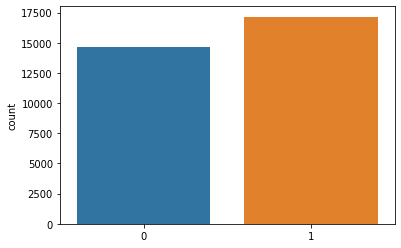

In [529]:
y2 = []

for index, row in k_ratings_f.iterrows():
    if row['rating_x'] <=3.5: 
        y2.append(0) 
    else:
        y2.append(1)
        
sns.countplot(y2)

In [527]:
k_ratings_f

,userId,movieId,rating_x,timestamp,name,year,rating_y,metascore,vote,imdb_id,...,genre1,year_n,runtime_n,label,label_c,y,director,director1,director2,actor1
0,181,8014,1.5,1547804302,"Spring, Summer, Fall, Winter... and Spring",(2003),8.0,85.0,74747.0,tt0374546,...,Drama,2003,103,33,33,2,Kiduk Kim,KidukKim,,KidukKim
1,181,27773,3.5,1547803413,Oldboy,(2003),8.4,77.0,494073.0,tt0364569,...,Mystery,2003,120,33,33,4,Chanwook Park,ChanwookPark,,MinsikChoi
2,181,107406,1.0,1547806302,Snowpiercer,(2013),7.1,84.0,292313.0,tt1706620,...,Action,2013,126,33,33,1,Bong Joon Ho,BongJoonHo,,ChrisEvans
3,181,158783,2.0,1547804998,The Handmaiden,(2016),8.1,84.0,100030.0,tt4016934,...,Drama,2016,145,33,33,2,Chanwook Park,ChanwookPark,,MinheeKim
4,181,27592,2.0,1547804683,Sympathy for Mr. Vengeance,(2002),7.6,56.0,60133.0,tt0310775,...,Crime,2002,129,33,33,2,Chanwook Park,ChanwookPark,,KanghoSong
5,181,51709,1.0,1547804670,The Host,(2006),7.1,85.0,100024.0,tt0468492,...,Comedy,2006,120,33,33,1,Bong Joon Ho,BongJoonHo,,KanghoSong
6,181,82667,0.5,1548873599,I Saw the Devil,(2010),7.8,67.0,103826.0,tt1588170,...,Crime,2010,144,33,33,1,Jeewoon Kim,JeewoonKim,,ByunghunLee
7,181,159061,0.5,1547806997,The Wailing,(2016),7.5,81.0,44565.0,tt5215952,...,Mystery,2016,156,33,33,1,Hongjin Na,HongjinNa,,JunKunimura
8,181,202439,1.5,1568045913,Parasite,(2019),8.6,96.0,421004.0,tt6751668,...,Comedy,2019,132,33,33,2,Bong Joon Ho,BongJoonHo,,KanghoSong
9,541,8014,4.5,1542827252,"Spring, Summer, Fall, Winter... and Spring",(2003),8.0,85.0,74747.0,tt0374546,...,Drama,2003,103,5,5,5,Kiduk Kim,KidukKim,,KidukKim


In [555]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will 

Num Features: 3
Selected Features: [ True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

In [537]:
# NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = TEST_SIZE, random_state = SEED)
X_train, X_test, y_train, y_test = train_test_split(X.values, np.array(y2), test_size = TEST_SIZE, random_state = SEED)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X.shape

(31769, 369)

In [538]:
model = Sequential()

model.add(Dense(369,activation='relu'))
model.add(Dense(180,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(45,activation='relu'))

# model.add(Dense(5,activation='softmax'))
# model.compile(optimizer='adam',loss='categorical_crossentropy')
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=10)

Train on 25415 samples, validate on 6354 samples
Epoch 1/10
25415/25415 [==============================] - 1s 42us/sample - loss: 0.6017 - val_loss: 0.5648
Epoch 2/10
25415/25415 [==============================] - 1s 28us/sample - loss: 0.5700 - val_loss: 0.5680
Epoch 3/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5616 - val_loss: 0.5616
Epoch 4/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5552 - val_loss: 0.5658
Epoch 5/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5495 - val_loss: 0.5718
Epoch 6/10
25415/25415 [==============================] - 1s 26us/sample - loss: 0.5441 - val_loss: 0.5699
Epoch 7/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5387 - val_loss: 0.5806
Epoch 8/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5327 - val_loss: 0.5802
Epoch 9/10
25415/25415 [==============================] - 1s 27us/sample - loss: 0.5284 - val_l

In [568]:
##################################
# save model (logistic regression)
##################################

import pickle
s = pickle.dumps(logreg)

In [569]:
logreg2 = pickle.loads(s)

In [570]:
logreg2.fit(X_train, y_train)
predictions = logreg2.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  69    4   35   81    9]
 [  21    6   46  187   10]
 [  18    0  187  864   67]
 [  16    1   99 2509  386]
 [  12    1   29 1033  664]]


Classification Report

              precision    recall  f1-score   support

           1       0.51      0.35      0.41       198
           2       0.50      0.02      0.04       270
           3       0.47      0.16      0.24      1136
           4       0.54      0.83      0.65      3011
           5       0.58      0.38      0.46      1739

    accuracy                           0.54      6354
   macro avg       0.52      0.35      0.36      6354
weighted avg       0.54      0.54      0.49      6354



Accuracy Score

0.540604343720491


In [571]:
from joblib import dump, load

In [572]:
dump(logreg, 'logreg.joblib')

['logreg.joblib']

In [573]:
logreg3 = load('logreg.joblib') 

In [574]:
logreg3.fit(X_train, y_train)
predictions = logreg3.predict(X_test)

model_evaluation(y_test, predictions)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix

[[  69    4   35   81    9]
 [  21    6   46  187   10]
 [  18    0  187  864   67]
 [  16    1   99 2509  386]
 [  12    1   29 1033  664]]


Classification Report

              precision    recall  f1-score   support

           1       0.51      0.35      0.41       198
           2       0.50      0.02      0.04       270
           3       0.47      0.16      0.24      1136
           4       0.54      0.83      0.65      3011
           5       0.58      0.38      0.46      1739

    accuracy                           0.54      6354
   macro avg       0.52      0.35      0.36      6354
weighted avg       0.54      0.54      0.49      6354



Accuracy Score

0.540604343720491
